In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from glob import glob

In [2]:
df = pd.read_csv('../input/tile_set/train_60.csv')
df.head()

,fn,fold,slide_name,start_x,start_y,tile_sz,slide_width,slide_height,target_fn
0,input_60_256/AssayPlate_Greiner_#655090_B03_T0...,0,AssayPlate_Greiner_#655090_B03_T0001F001L01,0,0,256,2556,2156,target_60_256/AssayPlate_Greiner_#655090_B03_T...
1,input_60_256/AssayPlate_Greiner_#655090_B03_T0...,0,AssayPlate_Greiner_#655090_B03_T0001F001L01,0,192,256,2556,2156,target_60_256/AssayPlate_Greiner_#655090_B03_T...
2,input_60_256/AssayPlate_Greiner_#655090_B03_T0...,0,AssayPlate_Greiner_#655090_B03_T0001F001L01,0,384,256,2556,2156,target_60_256/AssayPlate_Greiner_#655090_B03_T...
3,input_60_256/AssayPlate_Greiner_#655090_B03_T0...,0,AssayPlate_Greiner_#655090_B03_T0001F001L01,0,576,256,2556,2156,target_60_256/AssayPlate_Greiner_#655090_B03_T...
4,input_60_256/AssayPlate_Greiner_#655090_B03_T0...,0,AssayPlate_Greiner_#655090_B03_T0001F001L01,0,768,256,2556,2156,target_60_256/AssayPlate_Greiner_#655090_B03_T...


In [3]:
len(df)

16128

<AxesSubplot:ylabel='fold'>

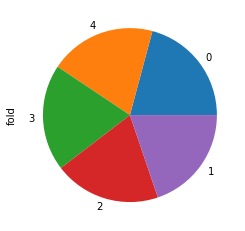

In [7]:
df.fold.value_counts().plot.pie()

In [8]:
df.slide_width.value_counts()

2556    16128
Name: slide_width, dtype: int64

In [9]:
df.slide_height.value_counts()

2156    16128
Name: slide_height, dtype: int64

In [10]:
IMG_DIR = '/data/'

In [16]:
IMG_20_DIR = os.path.join(IMG_DIR, '20x_images')
IMG_40_DIR = os.path.join(IMG_DIR, '40x_images')
IMG_60_DIR = os.path.join(IMG_DIR, '60x_images')

input_files_20 = glob(IMG_20_DIR + '/*C04.tif')
input_files_40 = glob(IMG_40_DIR + '/*C04.tif')
input_files_60 = glob(IMG_60_DIR + '/*C04.tif')

target_files_20 = glob(IMG_20_DIR + '/*C01.tif') + glob(IMG_20_DIR + '/*C02.tif') + glob(IMG_20_DIR + '/*C03.tif')
target_files_40 = glob(IMG_40_DIR + '/*C01.tif') + glob(IMG_40_DIR + '/*C02.tif') + glob(IMG_40_DIR + '/*C03.tif')
target_files_60 = glob(IMG_60_DIR + '/*C01.tif') + glob(IMG_60_DIR + '/*C02.tif') + glob(IMG_60_DIR + '/*C03.tif')

In [18]:
unique_slide_names = np.unique(np.array([(os.path.basename(fn).split('.')[0][:-9]) for fn in input_files_20]))

In [24]:
plot_slide=10

Input channels for zoom level: 20


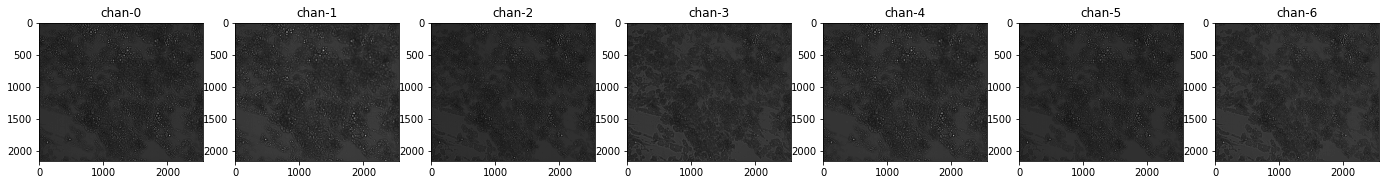

Input channels for zoom level: 40


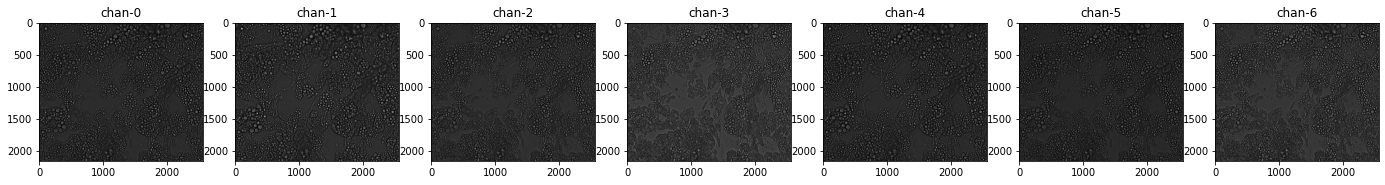

Input channels for zoom level: 60


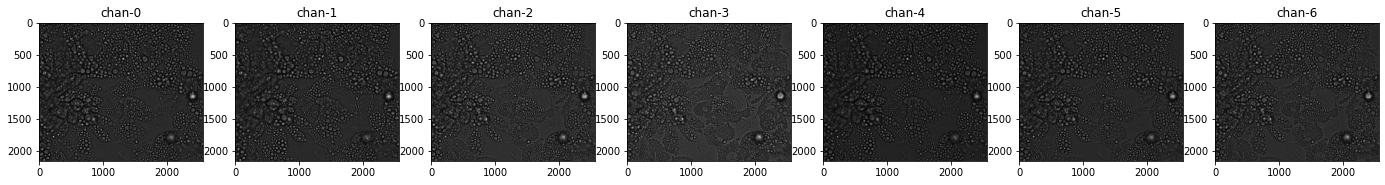

Target channels for zoom level: 20


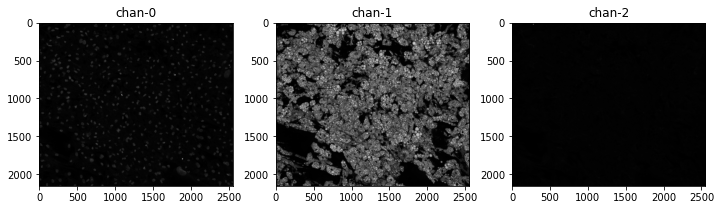

Target channels for zoom level: 40


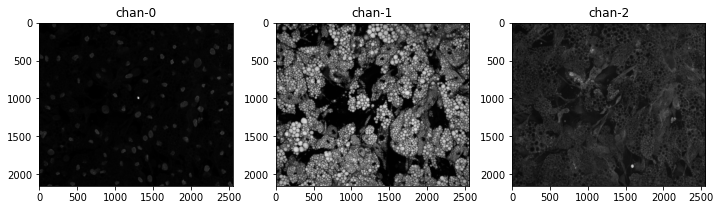

Target channels for zoom level: 60


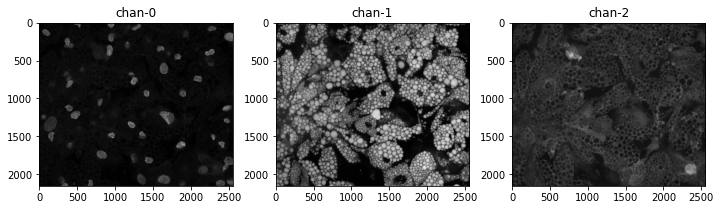

In [25]:
def plot_channels_separately(fns, size_factor=3):
    f, axs = plt.subplots(1, len(fns), figsize=((1 + len(fns))*size_factor, size_factor))
    for i, (ax, fn) in enumerate(zip(axs, fns)):
        ax.imshow(plt.imread(fn), cmap='gray')
        ax.set_title(f'chan-{i}')
    plt.show()

for input_files, size_text in zip([input_files_20, input_files_40, input_files_60], ['20','40','60']):
    print(f'Input channels for zoom level: {size_text}')
    input_files = [fn for fn in input_files if unique_slide_names[plot_slide] in fn]
    plot_channels_separately(input_files)
    
for target_files, size_text in zip([target_files_20, target_files_40, target_files_60], ['20','40','60']):
    print(f'Target channels for zoom level: {size_text}')
    target_files = [fn for fn in target_files if unique_slide_names[plot_slide] in fn]
    plot_channels_separately(target_files)